**Narzędzia - NumPy**

*Moduł NumPy stanowi podstawową bibliotekę używaną do obliczeń naukowych w języku Python. Jego działanie bazuje na N-wymiarowym obiekcie tablicy, dostępne są w nim również przydatne funkcje algebry liniowej, transformacji Fouriera i generowania liczb losowych.*

# Tworzenie tablic
Najpierw upewnijmy się, że notatnik ten będzie działał w środowiskach Python 2 i 3:

In [1]:
from __future__ import division, print_function, unicode_literals

Teraz importujmy moduł `numpy`. Większość osób korzysta z aliasu `np`:

In [2]:
import numpy as np

## Funkcja `np.zeros`

Funkcja `zeros` tworzy tablicę zawierającą same zera:

In [3]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

Równie łatwo stworzyć dwuwymiarową tablicę (tj. macierze) definiując krotkę o żądanej liczbie rzędów i kolumn. Poniżej prezentuję przykład macierzy o rozmiarze 3x4:

In [4]:
np.zeros((3,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

## Terminologia

* W kontekście modułu NumPy każdy wymiar jest nazywany **osią**,
* liczba osi to **rząd** (nie należy go mylić z rzędem jako wierszem macierzy),
    * na przykład powyższa macierz o rozmiarze 3x4 jest drugiego rzędu (dwuwymiarowa),
    * jej pierwsza oś ma długość 3, a druga - 4,
* lista zawierają długości osi jest określana jako **postać** macierzy,
    * przykłądowo postać powyższej macierzy to `(3, 4)`.
    * rząd macierzy jest równy długości postaci,
* przez **rozmiar** macierzy rozumiemy całkowitą liczbę elementów, czyli iloczyn długości wszystkich osi (np. 3*4=12).

In [5]:
a = np.zeros((3,4))
a

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [6]:
a.shape

(3, 4)

In [7]:
a.ndim  # to samo, co len(a.shape)

2

In [8]:
a.size

12

## N-wymiarowe tablice
Możemy również tworzyć N-wymiarowe tablice dowolnego rzędu. Na przykład, poniżej widzimy trójwymiarową tablicę (rząd=3), o postaci `(2,3,4)`:

In [9]:
np.zeros((2,3,4))

array([[[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]],

       [[ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.]]])

## Typ tablicy
Tablice NumPy są typu `ndarray`:

In [10]:
type(np.zeros((3,4)))

numpy.ndarray

## Funkcja `np.ones`
Istnieje wiele innych funkcji tworzących obiekty `ndarray`.

Tutaj mamy do czynienia z tablicą 3x4 wypełnioną jedynkami:

In [11]:
np.ones((3,4))

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

## Funkcja `np.full`
Tworzy tablicę o określonej postaci, inicjowaną z wyznaczoną wartością. Poniżej widzimy macierz o rozmiarze 3x4 wypełnioną wartościami `π`:

In [12]:
np.full((3,4), np.pi)

array([[ 3.14159265,  3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265,  3.14159265]])

## Funkcja `np.empty`
Nieinicjowana tablica o rozmiarze 2x3 (nie jesteśmy w stanie przewidzieć jej zawartości, ponieważ jest wypełniana wartościami znajdującymi się w danej chwili w pamięci):

In [13]:
np.empty((2,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

## Funkcja np.array
Możemy, oczywiście, zainicjować obiekt `ndarray` za pomocą tradycyjnej tablicy Python. Wystarczy wywołać funkcję `array`:

In [14]:
np.array([[1,2,3,4], [10, 20, 30, 40]])

array([[ 1,  2,  3,  4],
       [10, 20, 30, 40]])

## Funkcja `np.arange`
Możemy stworzyć obiekt `ndarray` przy użyciu funkcji `range`, której działanie przypomina wbudowaną funkcję `range` środowiska Python:

In [15]:
np.arange(1, 5)

array([1, 2, 3, 4])

Działa ona także z wartościami zmiennoprzecinkowymi:

In [16]:
np.arange(1.0, 5.0)

array([ 1.,  2.,  3.,  4.])

Oczywiście, możemy wprowadzić parametr skokowy:

In [17]:
np.arange(1, 5, 0.5)

array([ 1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5])

Jednak w przypadku wartości zmiennoprzecinkowych nie zawsze możemy przewidzieć liczbę elementów tablicy. Weź pod uwagę poniższy przykład:

In [18]:
print(np.arange(0, 5/3, 1/3)) # w zależności od błędów zmiennoprzecinkowych maksymalna wartość wynosi 4/3 lub 5/3
print(np.arange(0, 5/3, 0.333333333))
print(np.arange(0, 5/3, 0.333333334))


[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667]
[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667]
[ 0.          0.33333333  0.66666667  1.          1.33333334]


## Funkcja `np.linspace`
Z tego powodu generalnie zalecane jest stosowanie funkcji `linspace` zamiast funkcji `arange` podczas pracy z wartościami zmiennoprzecinkowymi. Funkcja `linspace` zwraca tablicę zawierającą określoną liczbę pozycji zmiennoprzecinkowych równo rozłożonych pomiędzy dwie wartości (zwróć uwagę, że, w przeciwieństwie do funkcji `arange`, jest tu *dołączona* maksymalna wartość):

In [19]:
print(np.linspace(0, 5/3, 6))

[ 0.          0.33333333  0.66666667  1.          1.33333333  1.66666667]


## Funkcje `np.rand` i `np.randn`
W module `random` znajdziemy wiele funkcji służących do inicjowania obiektu `ndarray` z losowymi wartościami. Przykładowo, poniżej widzimy macierz o rozmiarze 3x4 inicjowana z losowymi wartościami zmiennoprzecinkowymi w przedziale pomiędzy 0 i 1 (rozkład jednorodny):

In [20]:
np.random.rand(3,4)

array([[ 0.67232313,  0.06087387,  0.23770721,  0.58943109],
       [ 0.85062673,  0.47753856,  0.68014244,  0.36785323],
       [ 0.74043781,  0.97325712,  0.58685358,  0.53060741]])

Tutaj zaś widzimy macierz o rozmiarze 3x4 przechowującą losowe wartości zmiennoprzecinkowe uzyskiwane w wyniku jednowymiarowego [rozkładu normalnego](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_normalny) (gaussowskiego) o średniej 0 i wariancji 1:

In [21]:
np.random.randn(3,4)

array([[ 0.28181345, -0.91488581,  0.26739027, -1.34573295],
       [-1.1856842 , -0.53207069, -1.15333937, -2.16851347],
       [-1.2885064 , -1.5734793 ,  1.97817742, -1.34947465]])

Zwizualizujemy sobie te rozkłady korzystając z modułu matplotlib (szczegóły znajdziesz w [samouczku matplotlib](narzędzia_matplotlib.ipynb)):

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

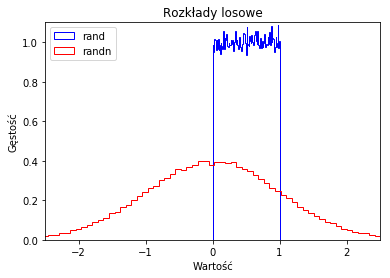

In [24]:
plt.hist(np.random.rand(100000), normed=True, bins=100, histtype="step", color="blue", label="rand")
plt.hist(np.random.randn(100000), normed=True, bins=100, histtype="step", color="red", label="randn")
plt.axis([-2.5, 2.5, 0, 1.1])
plt.legend(loc = "upper left")
plt.title("Rozkłady losowe")
plt.xlabel("Wartość")
plt.ylabel("Gęstość")
plt.show()

## Funkcja np.fromfunction
Możemy również inicjować obiekt `ndarray` za pomocą funkcji:

In [25]:
def my_function(z, y, x):
    return x * y + z

np.fromfunction(my_function, (3, 2, 10))

array([[[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]],

       [[  1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.,   1.],
        [  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]],

       [[  2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.,   2.],
        [  2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,  11.]]])

Moduł NumPy tworzy najpierw trzy obiekty `ndarrays` (po jednym na każdy wymiar) o postaci `(3, 2, 10)`. Każda tablica zawiera wartości równe współrzędnym po określonej osi. Na przykład wszystkie elementy w tablicy `z` określają współrzędne w osi z:

    [[[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
      [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
    
     [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
      [ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]
    
     [[ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]
      [ 2.  2.  2.  2.  2.  2.  2.  2.  2.  2.]]]

Zatem składowe x, y i z w powyższym wyrażeniu `x * y + z` są w rzeczywistości obiektami `ndarray` (niebawem zajmiemy się opisem operacji arytmetycznych na tablicach). Nas interesuje fakt, że  funkcja `my_function` jest wywoływana tylko *raz*, a nie po razie dla każdego elementu. Taka inicjacja okazuje się bardzo wydajna.

# Dane tablicy
## Atrybut `dtype`
Obiekty `ndarray` są bardzo wydajne częściowo również dlatego, że wszystkie ich elementy muszą być tego samego typu (zazwyczaj liczby). Możesz sprawdzić typ danych sprawdzając atrybut `dtype`:

In [26]:
c = np.arange(1, 5)
print(c.dtype, c)

int32 [1 2 3 4]


In [27]:
c = np.arange(1.0, 5.0)
print(c.dtype, c)

float64 [ 1.  2.  3.  4.]


Możemy ułatwić zadanie modułowi NumPy wyznaczając jawnie typ danych określając wartość parametru `dtype` podczas tworzenia tablicy:

In [28]:
d = np.arange(1, 5, dtype=np.complex64)
print(d.dtype, d)

complex64 [ 1.+0.j  2.+0.j  3.+0.j  4.+0.j]


Dostępne są następujące typy danych: `int8`, `int16`, `int32`, `int64`, `uint8`|`16`|`32`|`64`, `float16`|`32`|`64`, a także `complex64`|`128`. Pełną ich listę znajdziesz w [dokumentacji](http://docs.scipy.org/doc/numpy-1.10.1/user/basics.types.html).

## Atrybut `itemsize`
Atrybut `itemsize` zwraca rozmiar każdego elementu (w bajtach):

In [29]:
e = np.arange(1, 5, dtype=np.complex64)
e.itemsize

8

## Bufor `data`
Dane tablicy są w rzeczywistości przechowywane w pamięci jako płaski (jednowymiarowy) bufor bajtowy. Mamy do niego dostęp poprzez atrybut `data` (jednak nie korzystamy z niego często).

In [30]:
f = np.array([[1,2],[1000, 2000]], dtype=np.int32)
f.data

W środowisku Python2 buforem jest obiekt `f.data`, a w Python 3 - `memoryview`.

In [31]:
if (hasattr(f.data, "tobytes")):
    data_bytes = f.data.tobytes() # python 2
else:
    data_bytes = memoryview(f.data).tobytes() # python 3

data_bytes

b'\x01\x00\x00\x00\x02\x00\x00\x00\xe8\x03\x00\x00\xd0\x07\x00\x00'

Kilka obiektów `ndarray` może współdzielić ten sam bufor danych, co oznacza, że zmodyfikowanie jednej takiej tablicy zmodyfikuje również pozostałe. Już niebawem zobaczymy to na przykładzie.

# Zmiana postaci tablicy
## Na miejscu
Zmiana postaci obiektu `ndarray` wymaga jedynie wyznaczenia wartości atrybutu `shape`. Jednak rozmiar tablicy musi pozostać taki sam.

In [32]:
g = np.arange(24)
print(g)
print("Rząd:", g.ndim)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Rząd: 1


In [33]:
g.shape = (6, 4)
print(g)
print("Rząd:", g.ndim)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
Rząd: 2


In [34]:
g.shape = (2, 3, 4)
print(g)
print("Rząd:", g.ndim)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]
Rząd: 3


## Funkcja `reshape`
Funkcja `reshape` zwraca nowy obiekt `ndarray` wskazujący *te same* dane. Oznacza to, że modyfikacja jednej tablicy zmieni również drugą.

In [35]:
g2 = g.reshape(4,6)
print(g2)
print("Rząd:", g2.ndim)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]
 [12 13 14 15 16 17]
 [18 19 20 21 22 23]]
Rząd: 2


Wyznaczamy wartość 999 w pierwszym rzędzie, drugiej kolumnie (więcej informacji na temat indeksowania znajdziesz w dalszej części notatnika):

In [36]:
g2[1, 2] = 999
g2

array([[  0,   1,   2,   3,   4,   5],
       [  6,   7, 999,   9,  10,  11],
       [ 12,  13,  14,  15,  16,  17],
       [ 18,  19,  20,  21,  22,  23]])

Odpowiadający mu element w tablicy `g` również został zmodyfikowany.

In [37]:
g

array([[[  0,   1,   2,   3],
        [  4,   5,   6,   7],
        [999,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

## Funkcja `ravel`
Funkcja `ravel` zwraca jednowymiarową tablicę `ndarray`, również wskazującą te same dane:

In [38]:
g.ravel()

array([  0,   1,   2,   3,   4,   5,   6,   7, 999,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23])

# Operacje arytmetyczne
Obiekty `ndarray` "rozumieją" wszystkie standardowe operatory arytmetyczne (`+`, `-`, `*`, `/`, `//`, `**` itd.). Operacje arytmetyczne są przeprowadzane *po współrzędnych*:

In [39]:
a = np.array([14, 23, 32, 41])
b = np.array([5,  4,  3,  2])
print("a + b  =", a + b)
print("a - b  =", a - b)
print("a * b  =", a * b)
print("a / b  =", a / b)
print("a // b  =", a // b)
print("a % b  =", a % b)
print("a ** b =", a ** b)

a + b  = [19 27 35 43]
a - b  = [ 9 19 29 39]
a * b  = [70 92 96 82]
a / b  = [  2.8          5.75        10.66666667  20.5       ]
a // b  = [ 2  5 10 20]
a % b  = [4 3 2 1]
a ** b = [537824 279841  32768   1681]


Zwróć uwagę, że to *nie* jest iloczyn macierzowy. Operacjami macierzowymi zajmiemy się w dalszej części notatnika.

Tablice muszą mieć tę samą postać, w przeciwnym razie moduł NumPy zastosuje *reguły rozgłaszania*.

# Rozgłaszanie

Generalnie moduł NumPy oczekuje tablic o takiej samej postaci, jeżeli jednak jest inaczej, stosuje tak zwane reguły *rozgłaszania* (transmitowania):

## Pierwsza reguła
*Jeżeli tablice nie mają takiego samego rzędu, to do tablic o mniejszym rzędzie będą dodawane jedynki aż do ich wyrównania.*

In [40]:
h = np.arange(5).reshape(1, 1, 5)
h

array([[[0, 1, 2, 3, 4]]])

Spróbujmy teraz dodać jednowymiarową tablicę o postaci `(5,)` do tej trójwwymiarowej tablicy o postaci `(1,1,5)`. Sprawdzamy pierwszą regułę rozgłaszania!

In [41]:
h + [10, 20, 30, 40, 50]  # to samo, co: h + [[[10, 20, 30, 40, 50]]]

array([[[10, 21, 32, 43, 54]]])

## Druga reguła
*Tablice mające cyfrę 1 w określonym kierunku traktowane są tak, jakby miały rozmiar tablicy o największej postaci w tym wymiarze. Wzdłuż tego wymiaru jest powielana wartość tego elementu tablicy.*

In [42]:
k = np.arange(6).reshape(2, 3)
k

array([[0, 1, 2],
       [3, 4, 5]])

Spróbujmy dodać dwuwymiarową tablicę o postaci `(2,1)` do tego dwuwymiarowego obiektu `ndarray` o postaci `(2, 3)`. Moduł NumPy zastosuje drugą regułę rozgłaszania:

In [43]:
k + [[100], [200]]  # to samo, co: k + [[100, 100, 100], [200, 200, 200]]

array([[100, 101, 102],
       [203, 204, 205]])

Łącząc pierwszą i drugą regułę otrzymujemy:

In [44]:
k + [100, 200, 300]  # po pierwszej regule: [[100, 200, 300]], po drugiej regule: [[100, 200, 300], [100, 200, 300]]

array([[100, 201, 302],
       [103, 204, 305]])

A także bardzo prosto:

In [45]:
k + 1000  # to samo, co: k + [[1000, 1000, 1000], [1000, 1000, 1000]]

array([[1000, 1001, 1002],
       [1003, 1004, 1005]])

## Trzecia reguła
*Rozmiary wszystkich tablic muszą się zgadzać po zastosowaniu pierwszej i drugiej reguły.*

In [46]:
try:
    k + [33, 44]
except ValueError as e:
    print(e)

operands could not be broadcast together with shapes (2,3) (2,) 


Reguły rozgłaszania są wykorzystywane w wielu operacjach NumPy, nie tylko arytmetycznych, o czym dowiemy się już niebawem. Więcej informacji na temat rozgłaszania znajdziesz w [dokumentacji](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html).

## Rzutowanie w górę
Gdy próbujemy łączyć tablice o różnych wartościach atrybutu `dtype`, moduł NumPy będzie *rzutował w górę* do typu będącego w stanie obsługiwać wszystkie możliwe wartości (bez względu na *rzeczywisty* typ wartości).

In [47]:
k1 = np.arange(0, 5, dtype=np.uint8)
print(k1.dtype, k1)

uint8 [0 1 2 3 4]


In [48]:
k2 = k1 + np.array([5, 6, 7, 8, 9], dtype=np.int8)
print(k2.dtype, k2)

int16 [ 5  7  9 11 13]


Zwróć uwagę, że do reprezentowanie wszystkich *możliwych* wartości `int8` i `uint8` (w zakresie od -128 do 255) wymagany jest typ `int16`, nawet jeśli w tym przykładzie wystarczyłby typ `uint8`.

In [49]:
k3 = k1 + 1.5
print(k3.dtype, k3)

float64 [ 1.5  2.5  3.5  4.5  5.5]


# Operatory warunkowe 

Operatory warunkowe są również stosowane po współrzędnych:

In [50]:
m = np.array([20, -5, 30, 40])
m < [15, 16, 35, 36]

array([False,  True,  True, False], dtype=bool)

I za pomocą rozgłaszania:

In [51]:
m < 25  # równoważne wyrażeniu m < [25, 25, 25, 25]

array([ True,  True, False, False], dtype=bool)

Mechanizm ten jest najskuteczniejszy w połączeniu z indeksowaniem zerojedynkowym (omówionym poniżej).

In [52]:
m[m < 25]

array([20, -5])

# Funkcje matematyczne i statystyczne

Dostępnych jest wiele funkcji matematycznych i statystycznych dla obiektów `ndarray`.

## Metody obiektu `ndarray`
Niektóre z funkcji są po prostu metodami obiektu `ndarray`, na przykład:

In [53]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
print(a)
print("średnia =", a.mean())

[[ -2.5   3.1   7. ]
 [ 10.   11.   12. ]]
średnia = 6.76666666667


Zwróć uwagę, że obliczamy w ten sposób średnią ze wszystkich elementów obiektu `ndarray` bez względu na jego kształt.

Poniżej przedstawiam kilka innych przydatnych metod obiektu `ndarray`:

In [54]:
for func in (a.min, a.max, a.sum, a.prod, a.std, a.var):
    print(func.__name__, "=", func())

min = -2.5
max = 12.0
sum = 40.6
prod = -71610.0
std = 5.08483584352
var = 25.8555555556


Funkcje te przyjmują dodatkowy argument `axis`, pozwalający wykonywać daną operację na elementach wzdłuż danej osi. Na przykład: 

In [55]:
c=np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [56]:
c.sum(axis=0)  # suma po macierzach

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [57]:
c.sum(axis=1)  # suma po rzędach

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

Możemy także obliczać sumę po wielu osiach:

In [58]:
c.sum(axis=(0,2))  # suma po macierzach i kolumnach

array([ 60,  92, 124])

In [59]:
0+1+2+3 + 12+13+14+15, 4+5+6+7 + 16+17+18+19, 8+9+10+11 + 20+21+22+23

(60, 92, 124)

## Funkcje uniwersalne
Moduł NumPy zawiera także funkcje szybkich obliczeń po współrzędnych, zwane *funkcjami uniwersalnymi* (w skrócie **ufunc**). Są to zwektoryzowane formy prostych funkcji. Na przykład funkcja `square` zwraca nowy obiekt `ndarray`, który stanowi kopię pierwotnej tablicy `ndarray` zawierającą kwadraty oryginalnych wartości:

In [60]:
a = np.array([[-2.5, 3.1, 7], [10, 11, 12]])
np.square(a)

array([[   6.25,    9.61,   49.  ],
       [ 100.  ,  121.  ,  144.  ]])

Poniżej przedstawiam kilka innych, przydatnych funkcji uniwersalnych:

In [61]:
print("Pierwotny obiekt ndarray")
print(a)
for func in (np.abs, np.sqrt, np.exp, np.log, np.sign, np.ceil, np.modf, np.isnan, np.cos):
    print("\n", func.__name__)
    print(func(a))

Pierwotny obiekt ndarray
[[ -2.5   3.1   7. ]
 [ 10.   11.   12. ]]

 absolute
[[  2.5   3.1   7. ]
 [ 10.   11.   12. ]]

 sqrt
[[        nan  1.76068169  2.64575131]
 [ 3.16227766  3.31662479  3.46410162]]

 exp
[[  8.20849986e-02   2.21979513e+01   1.09663316e+03]
 [  2.20264658e+04   5.98741417e+04   1.62754791e+05]]

 log
[[        nan  1.13140211  1.94591015]
 [ 2.30258509  2.39789527  2.48490665]]

 sign
[[-1.  1.  1.]
 [ 1.  1.  1.]]

 ceil
[[ -2.   4.   7.]
 [ 10.  11.  12.]]

 modf
(array([[-0.5,  0.1,  0. ],
       [ 0. ,  0. ,  0. ]]), array([[ -2.,   3.,   7.],
       [ 10.,  11.,  12.]]))

 isnan
[[False False False]
 [False False False]]

 cos
[[-0.80114362 -0.99913515  0.75390225]
 [-0.83907153  0.0044257   0.84385396]]


C:\Users\Krzysztof\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Krzysztof\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: RuntimeWarning: invalid value encountered in log


## Binarne funkcje uniwersalne
Istnieje również wiele binarnych funkcji uniwersalnych, wykonujących operacje po współrzędnych dwóch obiektów `ndarray`. Jeżeli tablice nie mają takich samych postaci, stosowane są reguły rozgłaszania:

In [62]:
a = np.array([1, -2, 3, 4])
b = np.array([2, 8, -1, 7])
np.add(a, b)  # to samo, co a + b

array([ 3,  6,  2, 11])

In [63]:
np.greater(a, b)  # to samo, co a > b

array([False, False,  True, False], dtype=bool)

In [64]:
np.maximum(a, b)

array([2, 8, 3, 7])

In [65]:
np.copysign(a, b)

array([ 1.,  2., -3.,  4.])

# Indeksowanie tablic
## Jednowymiarowe tablice
Dostęp do jednowymiarowych tablic NumPy możemy uzyskiwać w bardzo podobnyc sposób, jak do standardowych tablic środowiska Python:

In [66]:
a = np.array([1, 5, 3, 19, 13, 7, 3])
a[3]

19

In [67]:
a[2:5]

array([ 3, 19, 13])

In [68]:
a[2:-1]

array([ 3, 19, 13,  7])

In [69]:
a[:2]

array([1, 5])

In [70]:
a[2::2]

array([ 3, 13,  3])

In [71]:
a[::-1]

array([ 3,  7, 13, 19,  3,  5,  1])

Oczywiście, możemy bez problemu modyfikować elementy tablicy:

In [72]:
a[3]=999
a

array([  1,   5,   3, 999,  13,   7,   3])

Możemy także modyfikować fragmenty obiektu `ndarray`:

In [73]:
a[2:5] = [997, 998, 999]
a

array([  1,   5, 997, 998, 999,   7,   3])

## Obiekty `ndarray` a standardowe tablice środowiska Python
W przeciwinieństwie do standardowych tablic środowiska Python, po przydzieleniu pojedynczej wartości do fragmentu obiektu `ndarray`, zostaje ona skopiowana po całym fragmencie dzięki omówionym powyżej regułom rozgłaszania.

In [74]:
a[2:5] = -1
a

array([ 1,  5, -1, -1, -1,  7,  3])

Nie możemy w ten sposób powiększać ani zmniejszać obiektu `ndarray`:

In [75]:
try:
    a[2:5] = [1,2,3,4,5,6]  # zbyt duża
except ValueError as e:
    print(e)

cannot copy sequence with size 6 to array axis with dimension 3


Nie możemy również usuwać elementów:

In [76]:
try:
    del a[2:5]
except ValueError as e:
    print(e)

cannot delete array elements


Ponadto fragmenty obiektu `ndarray` **są w rzeczywistości *widokami*** samego bufora danych. Oznacza to, że jeśli stworzysz taki fragment i zmodyfikujesz go, to w istocie zmodyfikujesz również oryginalny obiekt `ndarray`!

In [77]:
a_slice = a[2:6]
a_slice[1] = 1000
a  # pierwotna tablica została zmodyfikowana!

array([   1,    5,   -1, 1000,   -1,    7,    3])

In [78]:
a[3] = 2000
a_slice  # W analogiczny sposób modyfikacja pierwotnej tablicy zmienia również jej wycinek.

array([  -1, 2000,   -1,    7])

Jeżeli chcesz stworzyć kopię danych, musisz użyć metody `copy`:

In [79]:
another_slice = a[2:6].copy()
another_slice[1] = 3000
a  # pierwotna tablica została niezmieniona

array([   1,    5,   -1, 2000,   -1,    7,    3])

In [80]:
a[3] = 4000
another_slice  # na drodze analogii zmiana oryginalnej tablicy nie wpływa na jej wycinek.

array([  -1, 3000,   -1,    7])

## Tablice wielowymiarowe
W podobny sposób uzyskujemy dostęp do tablic wielowymiarowych poprzez określenie indeksu lub fragmentu dla każdej osi, rozdzielając je za pomocą przecinków:

In [81]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [82]:
b[1, 2]  # pierwszy rząd, druga kolumna

14

In [83]:
b[1, :]  # pierwszy rząd, wszystkie kolumny

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [84]:
b[:, 1]  # wszystkie rzędy, pierwsza kolumna

array([ 1, 13, 25, 37])

**Ostrzeżenie**: zwróć uwagę na subtelną różnicę pomiędzy następującymi wyrażeniami:

In [85]:
b[1, :]

array([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23])

In [86]:
b[1:2, :]

array([[12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]])

Pierwsze wyrażenie zwraca pierwszy rząd w formie jednowymiarowej tablicy o postaci `(12,)`, natomiast w drugim wyrażeniu ten sam rząd zostaje zwrócony jako dwuwymiarowa tablica o postaci `(1, 12)`.

## Dodatkowe sposoby indeksowania
Możemy również określać listę interesujących nas indeksów (tzw. nietypowe indeksowanie - ang. fancy indexing).

In [87]:
b[(0,2), 2:5]  # Zerowy i drugi rząd, dolumny od drugiej do czwartej (5-1)

array([[ 2,  3,  4],
       [26, 27, 28]])

In [88]:
b[:, (-1, 2, -1)]  # wszystkie rzędy, kolumny -1 (ostatnia), druga i ponownie -1 (dokładnie w takiej kolejności)

array([[11,  2, 11],
       [23, 14, 23],
       [35, 26, 35],
       [47, 38, 47]])

Jeśli wprowadzisz wiele tablic indeksów, uzyskasz jednowymiarowy obiekt `ndarray` zawierający wartości elementów w wyznaczonych współrzędnych.

In [89]:
b[(-1, 2, -1, 2), (5, 9, 1, 9)]  # zwraca jednowymiarową tablicę wyznaczającą punkty b[-1, 5], b[2, 9], b[-1, 1] i (znowu) b[2, 9]

array([41, 33, 37, 33])

## Większa liczba wymiarów
Zasady te dotyczącą również wielowymiarowych tablic, warto jednak przyjrzeć się kilku przykładom:

In [90]:
c = b.reshape(4,2,6)
c

array([[[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]],

       [[12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]],

       [[24, 25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34, 35]],

       [[36, 37, 38, 39, 40, 41],
        [42, 43, 44, 45, 46, 47]]])

In [91]:
c[2, 1, 4]  # druga macierz, pierwszy rząd, czwarta kolumna

34

In [92]:
c[2, :, 3]  # druga macierz, wszystkie rzędy, trzecia kolumna

array([27, 33])

jeśli pominiesz współrzędne dla niektórych osi, zostaną zwrócone wszystkie elementy leżące na tych osiach:

In [93]:
c[2, 1]  # Zwraca drugą macierz, pierwszy rząd, wszystkie kolumny; jest to równoznaczne wyrażeniu c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

## Wielokropek (`...`)
Za pomocą wielokropka (`...`) możesz sprawić, żeby wszystkie niewymienione osie zostały w całości uwzględnione.

In [94]:
c[2, ...]  #  druga macierz, wszystkie rzędy, wszystkie kolumny; jest to równoznaczne wyrażeniu c[2, :, :]

array([[24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [95]:
c[2, 1, ...]  # druga macierz, pierwszy rząd, wszystkie kolumny; jest to równoznaczne wyrażeniu c[2, 1, :]

array([30, 31, 32, 33, 34, 35])

In [96]:
c[2, ..., 3]  # druga macierz, wszystkie rzędy, trzecia kolumna; jest to równoznaczne wyrażeniu c[2, :, 3]

array([27, 33])

In [97]:
c[..., 3]  # wszystkie macierze, wszystkie rzędy, trzecia kolumna; jest to równoznaczne wyrażeniu c[:, :, 3]

array([[ 3,  9],
       [15, 21],
       [27, 33],
       [39, 45]])

## Indeksowanie zerojedynkowe
Możesz również uzyskać obiekt `ndarray` zawierający wartości zerojedynkowe na jednej osi, definiujące indeksy, do których chcesz uzyskać dostęp.

In [98]:
b = np.arange(48).reshape(4, 12)
b

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35],
       [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]])

In [99]:
rows_on = np.array([True, False, True, False])
b[rows_on, :]  # Zerowy i drugi rząd, wszystkie kolumny; jest to równoznaczne wyrażeniu b[(0, 2), :]

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11],
       [24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]])

In [100]:
cols_on = np.array([False, True, False] * 4)
b[:, cols_on]  # Wszystkie rzędy, pierwsza, czwarta, siódma i dziesiąta kolumna

array([[ 1,  4,  7, 10],
       [13, 16, 19, 22],
       [25, 28, 31, 34],
       [37, 40, 43, 46]])

## Funkcja `np.ix_`
Nie możemy w ten sposób używać indeksowania zerojedynkowego wobec wielu osi naraz, ale możemy rozwiązać ten problem za pomocą funkcji `ix_`:

In [101]:
b[np.ix_(rows_on, cols_on)]

array([[ 1,  4,  7, 10],
       [25, 28, 31, 34]])

In [102]:
np.ix_(rows_on, cols_on)

(array([[0],
        [2]], dtype=int64), array([[ 1,  4,  7, 10]], dtype=int64))

Jeżeli korzystamy z tablicy zerojedynkowej mającej taką samą postać, jak obiekt `ndarray`, to możemy otrzymać jednowymiarową tablicę zawierającą wszystkie współrzędne, których wartość wynosi `True`. Rozwiązanie to jest często stosowane wraz z operatorami warunkowymi:

In [103]:
b[b % 3 == 1]

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43, 46])

# Przebiegi
Przebiegi wobec obiektu `ndarray` bardzo przypominają przebiegi wobec standardowych tablic środowiska Python. Zwróć uwagę, że przebiegi względem wielowymiarowych tablic są przeprowadzane w odniesieniu do pierwszej osi.

In [104]:
c = np.arange(24).reshape(2, 3, 4)  # Trójwymiarowa tablica (składająca się z dwóch macierzy o wymiarach 3x4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [105]:
for m in c:
    print("Element:")
    print(m)

Element:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Element:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


In [106]:
for i in range(len(c)):  # Zwróć uwagę, że len(c) == c.shape[0]
    print("Element:")
    print(c[i])

Element:
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
Element:
[[12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]


Jeśli chcesz wykonywać przebiegi względem *wszystkich* elementów obiektu `ndarray`, wystarczy skorzystać z atrybutu `flat`:

In [107]:
for i in c.flat:
    print("Element:", i)

Element: 0
Element: 1
Element: 2
Element: 3
Element: 4
Element: 5
Element: 6
Element: 7
Element: 8
Element: 9
Element: 10
Element: 11
Element: 12
Element: 13
Element: 14
Element: 15
Element: 16
Element: 17
Element: 18
Element: 19
Element: 20
Element: 21
Element: 22
Element: 23


# Stosy tablic
Często przydaje się tworzenie stosów składających się z różnych tablic. Model NumPy zawiera kilka funkcji umożliwiającej tę czynność. Zacznijmy od utworzenia kilku tablic.

In [108]:
q1 = np.full((3,4), 1.0)
q1

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.]])

In [109]:
q2 = np.full((4,4), 2.0)
q2

array([[ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.]])

In [110]:
q3 = np.full((3,4), 3.0)
q3

array([[ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.]])

## Funkcja `vstack`
Stwórzmy teraz ich pionowy stos za pomoca funkcji `vstack`:

In [111]:
q4 = np.vstack((q1, q2, q3))
q4

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.]])

In [112]:
q4.shape

(10, 4)

Jest to możliwe, ponieważ macierze q1, q2 i q3 mają tę samą postać (oprócz osi pionowej, ale nie szkodzi, ponieważ układamy stos właśnie wzdłuż niej).

## Funkcja `hstack`
Możemy także tworzyć poziomy stos przy użyciu funkcji `hstack`:

In [113]:
q5 = np.hstack((q1, q3))
q5

array([[ 1.,  1.,  1.,  1.,  3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  3.,  3.,  3.,  3.],
       [ 1.,  1.,  1.,  1.,  3.,  3.,  3.,  3.]])

In [114]:
q5.shape

(3, 8)

Jesteśmy w stanie tego dokonać, ponieważ macierze q1 i q3 mają po trzy rzędy. Jednakże tablica q2 ma cztery rzędy, dlatego nie możemy jej ułożyć w stos wraz z macierzami q1 i q3:

In [115]:
try:
    q5 = np.hstack((q1, q2, q3))
except ValueError as e:
    print(e)

all the input array dimensions except for the concatenation axis must match exactly


## Funkcja `concatenate`
Funkcja `concatenate` układa tablice w stos wzdłuż danej istniejącej osi.

In [116]:
q7 = np.concatenate((q1, q2, q3), axis=0)  # To samo, co funkcja vstack
q7

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 2.,  2.,  2.,  2.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.]])

In [117]:
q7.shape

(10, 4)

Jak łatwo odgadnąć, wywołanie funkcji `concatenate` wraz z parametrem `axis=1` jest równoznaczne wywołaniu funkcji `hstack`.

## Funkcja `stack`
Funkcja `stack` układa macierze w stosie wzdłuż nowej osi. Wszystkie tablice muszą mieć tę samą postać.

In [118]:
q8 = np.stack((q1, q3))
q8

array([[[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.]],

       [[ 3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.],
        [ 3.,  3.,  3.,  3.]]])

In [119]:
q8.shape

(2, 3, 4)

# Rozdzielanie tablic
Rozdzielanie tablic jest proces przeciwnym do układania ich w stos. Na przykład, użyjmy funkcji `vsplit` do pionowego rozdzielenia macierzy.

Najpierw stwórzmy macierz o rozmiarze 6x4:

In [120]:
r = np.arange(24).reshape(6,4)
r

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

Rozdzielmy ją teraz pionowo na trzy równe części:

In [121]:
r1, r2, r3 = np.vsplit(r, 3)
r1

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [122]:
r2

array([[ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [123]:
r3

array([[16, 17, 18, 19],
       [20, 21, 22, 23]])

Dostępna jest również funkcja `split`, która rozdziela tablicę wzdłuż określonej osi. Wywołanie funkcji `vsplit` jest równoznaczne wywołaniu funkcji `split` z parametrem `axis=0`. Z kolei funkcja `hsplit` jest odpowiednikiem wywołania funkcji `split` z parametrem `axis=1`:

In [124]:
r4, r5 = np.hsplit(r, 2)
r4

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13],
       [16, 17],
       [20, 21]])

In [125]:
r5

array([[ 2,  3],
       [ 6,  7],
       [10, 11],
       [14, 15],
       [18, 19],
       [22, 23]])

# Transpozycja tablic
Metoda `transpose` tworzy nowy widok danych obiektu `ndarray`, w której osie zostają przestawione w określonym porzadku.

Stwórzmy, na przykład, nową trójwymiarową tablicę:

In [126]:
t = np.arange(24).reshape(4,2,3)
t

array([[[ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11]],

       [[12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23]]])

Stwórzmy teraz obiekt `ndarray`, którego osie `0, 1, 2` (głębokość, wysokość, szerokość) zostaną przestawione w następujący sposób: `1, 2, 0` (głębokość→szerokość, wysokość→głębokość, szerokość→wysokość):

In [127]:
t1 = t.transpose((1,2,0))
t1

array([[[ 0,  6, 12, 18],
        [ 1,  7, 13, 19],
        [ 2,  8, 14, 20]],

       [[ 3,  9, 15, 21],
        [ 4, 10, 16, 22],
        [ 5, 11, 17, 23]]])

In [128]:
t1.shape

(2, 3, 4)

Domyślnie funkcja `transpose` odwraca szyk wymiarów:

In [129]:
t2 = t.transpose()  # równoznaczne zapisowi t.transpose((2, 1, 0))
t2

array([[[ 0,  6, 12, 18],
        [ 3,  9, 15, 21]],

       [[ 1,  7, 13, 19],
        [ 4, 10, 16, 22]],

       [[ 2,  8, 14, 20],
        [ 5, 11, 17, 23]]])

In [130]:
t2.shape

(3, 2, 4)

Moduł NumPy zawiera wygodną funkcję `swapaxes` zamieniającą miejscami dwie osie. Na przykład, stwórzmy nowy widok macierzy `t` z przestawionymi osiami głębokości i wysokości:

In [131]:
t3 = t.swapaxes(0,1)  # równoznaczne wyrażeniu t.transpose((1, 0, 2))
t3

array([[[ 0,  1,  2],
        [ 6,  7,  8],
        [12, 13, 14],
        [18, 19, 20]],

       [[ 3,  4,  5],
        [ 9, 10, 11],
        [15, 16, 17],
        [21, 22, 23]]])

In [132]:
t3.shape

(2, 4, 3)

# Algebra liniowa
Dwuwymiarowe tablice NumPy bardzo skutecznie reprezentują macierze w środowisku Python. Przyjrzymy się pobieżnie najważniejszym operacjom macierzowym, jakie możemy tu wykonywać. Szczegółowe informacje na temat algebry liniowej, wektorów i macierzy znajdziesz w [samouczku algebry liniowe](algebra_liniowa.ipynb).

## Macierz transponowana
Atrybut `T` stanowi odpowiednik wywołania funkcji `transpose()`, gdy rząd macierzy ≥2:

In [133]:
m1 = np.arange(10).reshape(2,5)
m1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [134]:
m1.T

array([[0, 5],
       [1, 6],
       [2, 7],
       [3, 8],
       [4, 9]])

Atrybut `T` nie ma żadnego wpływu na tablice zerowego (puste) lub pierwszego rzędu:

In [135]:
m2 = np.arange(5)
m2

array([0, 1, 2, 3, 4])

In [136]:
m2.T

array([0, 1, 2, 3, 4])

Możemy wykonać ich transpozycję przekształcając jednowymiarową tablicę do postaci jednorzędowej macierzy dwuwymiarowej:

In [137]:
m2r = m2.reshape(1,5)
m2r

array([[0, 1, 2, 3, 4]])

In [138]:
m2r.T

array([[0],
       [1],
       [2],
       [3],
       [4]])

## Iloczyn skalarny
Stwórzmy dwie macierze i przeprowadźmy na nich [iloczyn skalarny](https://pl.wikipedia.org/wiki/Iloczyn_skalarny) za pomocą metody `dot`.

In [139]:
n1 = np.arange(10).reshape(2, 5)
n1

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [140]:
n2 = np.arange(15).reshape(5,3)
n2

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [141]:
n1.dot(n2)

array([[ 90, 100, 110],
       [240, 275, 310]])

**Ostrzeżenie**: jak już wspomniałem wcześniej, operacja `n1*n2` *nie* jest iloczynem skalarnym, lecz mnożeniem po współrzędnych.

## Macierz odwrotna i pseudoodwrotna
Wiele funkcji algebry linowej znajduje się w module `numpy.linalg`; dotyczy to zwłaszcza funkcji `inv`, obliczającej odwrotność macierzy kwadratowej:

In [142]:
import numpy.linalg as linalg

m3 = np.array([[1,2,3],[5,7,11],[21,29,31]])
m3

array([[ 1,  2,  3],
       [ 5,  7, 11],
       [21, 29, 31]])

In [143]:
linalg.inv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

Możemy również obliczyć [pseudoodwrotność macierzy](https://pl.wikipedia.org/wiki/Uog%C3%B3lniona_macierz_odwrotna) za pomocą funkcji `pinv`:

In [144]:
linalg.pinv(m3)

array([[-2.31818182,  0.56818182,  0.02272727],
       [ 1.72727273, -0.72727273,  0.09090909],
       [-0.04545455,  0.29545455, -0.06818182]])

## Macierz jednostkowa
Iloczyn macierzy przez jej odwrotność zawsze daje macierz jednostkową (nie licząc drobnych błędów zmiennoprzecinkowych):

In [145]:
m3.dot(linalg.inv(m3))

array([[  1.00000000e+00,  -1.11022302e-16,   0.00000000e+00],
       [ -1.33226763e-15,   1.00000000e+00,  -1.11022302e-16],
       [  2.88657986e-15,   0.00000000e+00,   1.00000000e+00]])

Możesz stworzyć macierz jednostkową o rozmiarze NxN wywołując funkcję `eye`:

In [146]:
np.eye(3)

array([[ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

## Rozkład QR
Funkcja `qr` oblicza [rozkład QR ](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_QR) macierzy:

In [147]:
q, r = linalg.qr(m3)
q

array([[-0.04627448,  0.98786672,  0.14824986],
       [-0.23137241,  0.13377362, -0.96362411],
       [-0.97176411, -0.07889213,  0.22237479]])

In [148]:
r

array([[-21.61018278, -29.89331494, -32.80860727],
       [  0.        ,   0.62427688,   1.9894538 ],
       [  0.        ,   0.        ,  -3.26149699]])

In [149]:
q.dot(r)  # q.r równa się m3

array([[  1.,   2.,   3.],
       [  5.,   7.,  11.],
       [ 21.,  29.,  31.]])

## Wyznacznik
Funkcja `det` oblicza [wyznacznik macierzy](https://pl.wikipedia.org/wiki/Wyznacznik):

In [150]:
linalg.det(m3)  # Oblicza wyznacznik funkcji

43.999999999999972

## Wektory własne i wartości własne
Funkcja `eig` oblicza [wartości własne i wektory własne](https://pl.wikipedia.org/wiki/Wektory_i_warto%C5%9Bci_w%C5%82asne) macierzy kwadratowej:

In [151]:
eigenvalues, eigenvectors = linalg.eig(m3)
eigenvalues # λ

array([ 42.26600592,  -0.35798416,  -2.90802176])

In [152]:
eigenvectors # v

array([[-0.08381182, -0.76283526, -0.18913107],
       [-0.3075286 ,  0.64133975, -0.6853186 ],
       [-0.94784057, -0.08225377,  0.70325518]])

In [153]:
m3.dot(eigenvectors) - eigenvalues * eigenvectors  # m3.v - λ*v = 0

array([[  6.66133815e-15,   1.66533454e-15,  -3.33066907e-15],
       [  7.10542736e-15,   5.52335955e-15,  -4.66293670e-15],
       [  3.55271368e-14,   5.08620923e-15,  -1.06581410e-14]])

## Rozkład według wartości osobliwych
Funkcja `svd` pobiera macierz i zwraca jej [rozkład według wartości osobliwych](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych):

In [154]:
m4 = np.array([[1,0,0,0,2], [0,0,3,0,0], [0,0,0,0,0], [0,2,0,0,0]])
m4

array([[1, 0, 0, 0, 2],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0]])

In [155]:
U, S_diag, V = linalg.svd(m4)
U

array([[ 0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.],
       [ 0.,  0.,  1.,  0.]])

In [156]:
S_diag

array([ 3.        ,  2.23606798,  2.        ,  0.        ])

Funkcja `svd` zwraca jedynie wartości głównej przekątnej macierzy Σ, nam jednak zależy na całej macierzy Σ, dlatego teraz ją uzyskamy:

In [157]:
S = np.zeros((4, 5))
S[np.diag_indices(4)] = S_diag
S  # Σ

array([[ 3.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  2.23606798,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [158]:
V

array([[-0.        ,  0.        ,  1.        , -0.        ,  0.        ],
       [ 0.4472136 , -0.        , -0.        , -0.        ,  0.89442719],
       [-0.        ,  1.        ,  0.        , -0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  1.        ,  0.        ],
       [-0.89442719,  0.        ,  0.        ,  0.        ,  0.4472136 ]])

In [159]:
U.dot(S).dot(V) # U.Σ.V == m4

array([[ 1.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  3.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.]])

## Główna przekątna i ślad

In [160]:
np.diag(m3)  # Wartości głównej przekątnej macierzy m3 (od lewej górnej do prawej dolnej)

array([ 1,  7, 31])

In [161]:
np.trace(m3)  # to samo, co np.diag(m3).sum()

39

## Rozwiązywanie układu równań liniowych w postaci skalarnej

Funkcja `solve` rozwiązuje skalarnej układy równań liniowych, takie jak:

* $2x + 6y = 6$
* $5x + 3y = -9$

In [162]:
coeffs  = np.array([[2, 6], [5, 3]])
depvars = np.array([6, -9])
solution = linalg.solve(coeffs, depvars)
solution

array([-3.,  2.])

Sprawdźmy rozwiązanie:

In [163]:
coeffs.dot(solution), depvars  # tak, to jest to samo

(array([ 6., -9.]), array([ 6, -9]))

Wygląda nieźle! Poniżej przedstawiam alternatywny sposób sprawdzenia rozwiązania:

In [164]:
np.allclose(coeffs.dot(solution), depvars)

True

# Wektoryzacja
Nie musimy przeprowadzać pojedynczo operacji na poszczególnych elementach tablicy; nasz kod będzie znacznie wydajniejszy, jeśli będziemy trzymać się operacji na tablicach. Zjawisko to jest znane jako *wektoryzacja*. W ten sposób możemy korzystać z wielu usprawnień modułu NumPy.

Załóżmy, na przykład, że chcemy wygenerować tablicę o rozmiarach 768x1024 na podstawie równania $sin(xy/40.5)$. **Złym** rozwiązaniem byłby kod środowiska Python wykorzystujący pętle zagnieżdżone:

In [165]:
import math
data = np.empty((768, 1024))
for y in range(768):
    for x in range(1024):
        data[y, x] = math.sin(x*y/40.5)  # ŹLE! Bardzo niewydajnie.

Jasne, ta metoda będzie działać, jest jednak niezwykle nieefektywna, ponieważ pętle zajmują miejsce w samym środowisku Python. Zwektoryzujmy ten algorytm. Najpierw wykorzystamy funkcję `meshgrid` przekształcającą wektory współrzędnych w macierze współrzędnych.

In [166]:
x_coords = np.arange(0, 1024)  # [0, 1, 2, ..., 1023]
y_coords = np.arange(0, 768)   # [0, 1, 2, ..., 767]
X, Y = np.meshgrid(x_coords, y_coords)
X

array([[   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       ..., 
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023],
       [   0,    1,    2, ..., 1021, 1022, 1023]])

In [167]:
Y

array([[  0,   0,   0, ...,   0,   0,   0],
       [  1,   1,   1, ...,   1,   1,   1],
       [  2,   2,   2, ...,   2,   2,   2],
       ..., 
       [765, 765, 765, ..., 765, 765, 765],
       [766, 766, 766, ..., 766, 766, 766],
       [767, 767, 767, ..., 767, 767, 767]])

Jak widać, zarówno `X` jak i `Y` są tablicami o rozmiarze 768x1024, zaś wszystkie wartości w tablicy `X` dotyczą osi poziomej, a w tablicy `Y` - osi pionowej.

Teraz wystarczy obliczyć wynik za pomocą odpowiedniej operacji:

In [168]:
data = np.sin(X*Y/40.5)

Narysujmy teraz wykres tych danych za pomoca funkcji`imshow` modułu matplotlib (szczegóły znajdziesz w [samouczku matplotlib](narzędzia_matplotlib.ipynb)).

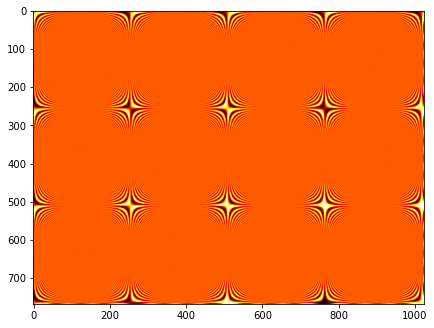

In [169]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
fig = plt.figure(1, figsize=(7, 6))
plt.imshow(data, cmap=cm.hot, interpolation="bicubic")
plt.show()

# Zapisywanie i wczytywanie
Moduł NumPy ułatwia nam zapisywanie i wczytywanie obiektów `ndarray` w formacie binarnym lub tekstowym.

## Format binarny `.npy`
Stwórzmy losową tablicę i zapiszmy ją.

In [170]:
a = np.random.rand(2,3)
a

array([[ 0.01778459,  0.70369519,  0.19681376],
       [ 0.80977288,  0.04785896,  0.67007444]])

In [172]:
np.save("moja_tablica", a)

Zrobione! Nie zdefiniowaliśmy rozszerzenia pliku, dlatego moduł NumPy automatycznie dodaje końcówkę `.npy`. Sprawdźmy zawartość tego pliku:

In [173]:
with open("moja_tablica.npy", "rb") as f:
    content = f.read()

content

b"\x93NUMPY\x01\x00F\x00{'descr': '<f8', 'fortran_order': False, 'shape': (2, 3), }          \n\xa0\xc0\x81\xb4\x1f6\x92?O\x84T\xc5\xab\x84\xe6?\xa0Y\x18z11\xc9?=\x86I\xd1\xa8\xe9\xe9?\xd0<\xebL\xf8\x80\xa8?\x9fr\x97\xf4?q\xe5?"

Aby wczytać ten plik jako tablicę NumPy, wystarczy wywołać funkcję `load`:

In [174]:
a_loaded = np.load("moja_tablica.npy")
a_loaded

array([[ 0.01778459,  0.70369519,  0.19681376],
       [ 0.80977288,  0.04785896,  0.67007444]])

## Format tekstowy
Spróbujmy zapisać tę tablicę w formacie tekstowym:

In [175]:
np.savetxt("moja_tablica.csv", a)

Sprawdźmy zawartość pliku:

In [176]:
with open("moja_tablica.csv", "rt") as f:
    print(f.read())

1.778459109522201320e-02 7.036951879600880089e-01 1.968137594382826094e-01
8.097728812828745015e-01 4.785896243049025944e-02 6.700744416408105364e-01



Jest to plik CSV, w którym tabulatory pełnią funkcję rozgraniczników. Możemy wyznaczyć inny rozgranicznik:

In [177]:
np.savetxt("moja_tablica.csv", a, delimiter=",")

Wczytujemy ten plik za pomocą funkcji `loadtxt`:

In [178]:
a_loaded = np.loadtxt("moja_tablica.csv", delimiter=",")
a_loaded

array([[ 0.01778459,  0.70369519,  0.19681376],
       [ 0.80977288,  0.04785896,  0.67007444]])

## Archiwum  `.npz`
Możemy również zachowywać wiele tablic w pojedynczym archiwum ZIP:

In [179]:
b = np.arange(24, dtype=np.uint8).reshape(2, 3, 4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]], dtype=uint8)

In [180]:
np.savez("moje_tablice", my_a=a, my_b=b)

Wypadałoby znowu zajrzeć do tego pliku. Zwróć uwagę, że rozszerzenie `.npz` zostało automatycznie dodane.

In [181]:
with open("moje_tablice.npz", "rb") as f:
    content = f.read()

repr(content)[:180] + "[...]"

'b"PK\\x03\\x04\\x14\\x00\\x00\\x00\\x00\\x00\\xaa\\x93kL\\xb6Y\\xb6\\x82\\x80\\x00\\x00\\x00\\x80\\x00\\x00\\x00\\x08\\x00\\x00\\x00my_a.npy\\x93NUMPY\\x01\\x00F\\x00{\'descr\': \'<f8\', \'fortran_order\': False, \'s[...]'

Teraz możemy wczytać ten plik w następujący sposób:

In [182]:
my_arrays = np.load("moje_tablice.npz")
my_arrays

Jest to obiekt słownikopodobny, który "leniwie" wczytuje tablice:

In [183]:
my_arrays.keys()

['my_a', 'my_b']

In [184]:
my_arrays["my_a"]

array([[ 0.01778459,  0.70369519,  0.19681376],
       [ 0.80977288,  0.04785896,  0.67007444]])

# Co dalej?
Znasz już podstawy modułu NumPy, ale na tym zdecydowanie nie kończą się możliwości. Najlepszą nauką jest eksperymentowanie z funkcjami modułu NumPy, a także zapoznanie się ze znakomitą [dokumentacją](http://docs.scipy.org/doc/numpy/reference/index.html), zawierającą opis wielu funkcji, które mogą Cię zainteresować.